## Vader Sentiment News Analysis


In [16]:
import json
import tweepy
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt 
from pprint import pprint
import pandas as pd
import time

from twitterapi import consumer_key, consumer_secret, access_token, access_token_secret

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [17]:
handles = [ '@BBCWorld', '@CBS', '@CNN', '@FoxNews','@nytimes']


#Collects the text of each tweet
tweets = []
#Collects the date of each tweet
timestamps = []
#This is used to create a list of media company names. List will be added to the final dataframe 
newsorg = []
#This stores all of the values of the timestamps list once they have been converted to date objects
converted = []
#This collects the compound sentiment score of each tweet
compl = []
#This collects the positive sentiment score of each tweet
posl= []
#This collects the neutral sentiment score of each tweet
neul= []
#This collects the negative sentiment score of each tweet
negl= []

#This stores the integers 1 through 100 and is used to create the first graph
tweet_num = []
tweet_num = np.arange(1,101)


#Loop through each media company
for handle in handles:
    
    #Loop through the api request five times for each company
    for page in tweepy.Cursor(api.user_timeline, id = handle).pages(5):
        public_tweets = page
        
        # Loop through all tweets
        for tweet in public_tweets:
            
            tweets.append(tweet._json['text'])
            timestamps.append(tweet._json["created_at"])
            newsorg.append(handle)
        
#Convert timestamp elements to date objects
for time in timestamps:
    converted_time1 = datetime.strptime(time, "%a %b %d %H:%M:%S %z %Y")
    converted.append(converted_time1)


#Perform sentiment analysis on each tweet
for sentence in tweets:

    compl.append(analyzer.polarity_scores(sentence)["compound"])
    posl.append(analyzer.polarity_scores(sentence)["pos"])
    neul.append(analyzer.polarity_scores(sentence)["neu"])
    negl.append(analyzer.polarity_scores(sentence)["neg"])
    
#Create DF with all tweet information    
sentiment_DF= pd.DataFrame({'Company': newsorg, 'Date':converted,'Tweets':tweets ,'Compound': compl,'Positive': posl,'Neutral': neul, 'Negative': negl})

sentiment_DF.to_csv('News.csv')

### Sentiment Analysis of Media Tweets

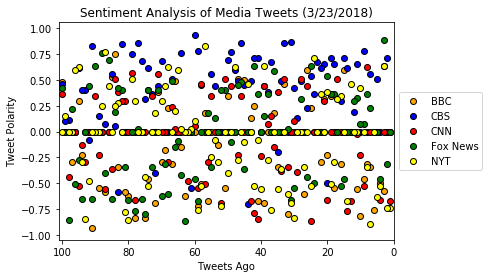

In [49]:

#Subset dataframe into five objects, one for each company's compound sentiment scores
bbc_sent = sentiment_DF.loc[sentiment_DF.loc[:,'Company'] == '@BBCWorld','Compound']
cbs_sent = sentiment_DF.loc[sentiment_DF.loc[:,'Company'] == '@CBS','Compound']
cnn_sent = sentiment_DF.loc[sentiment_DF.loc[:,'Company'] == '@CNN','Compound']
fox_sent = sentiment_DF.loc[sentiment_DF.loc[:,'Company'] == '@FoxNews','Compound']
nyt_sent = sentiment_DF.loc[sentiment_DF.loc[:,'Company'] == '@nytimes','Compound']

#Scatter plot compound sentiment scores for each company
bbc = plt.scatter(tweet_num, bbc_sent, color = 'orange', edgecolor='black')
cbs = plt.scatter(tweet_num, cbs_sent, color = 'blue', edgecolor='black')
cnn = plt.scatter(tweet_num, cnn_sent, color = 'red', edgecolor='black')
fox = plt.scatter(tweet_num, fox_sent, color = 'green', edgecolor='black')
nyt = plt.scatter(tweet_num, nyt_sent, color = 'yellow', edgecolor='black')

#Flip x-axis for better presentation
plt.xlim(101,0)

plt.title('Sentiment Analysis of Media Tweets (3/23/2018)')
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.legend((bbc,cbs,cnn,fox,nyt),('BBC','CBS','CNN','Fox News','NYT'), loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('Individual Tweet Analysis', bbox_inches='tight', pad_inches=0)

plt.show()



### Overall Media Sentiment Based on Twitter

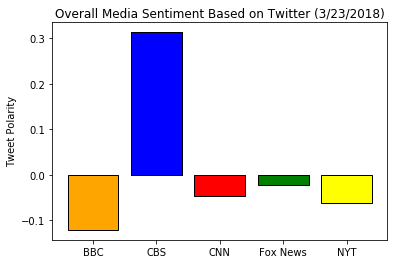

In [50]:

#Create a bar chart of overall sentiment of each company's twitter account for last 100 tweets

plt.bar(['BBC','CBS','CNN','Fox News','NYT'],[pd.Series(bbc_sent).mean(),pd.Series(cbs_sent).mean(),
         pd.Series(cnn_sent).mean(),pd.Series(fox_sent).mean(),
         pd.Series(nyt_sent).mean()], color = ['orange','blue','red','green', 'yellow'], edgecolor = ['black','black','black','black','black'])

plt.title("Overall Media Sentiment Based on Twitter (3/23/2018)")
plt.ylabel("Tweet Polarity")

plt.savefig('Overall Sentiment Analysis')

plt.show()



### Observations:
1- CBS's last 100 tweets were, on average, dramatically more positive than the tweets of the other
organizations. The overall sentiments of the other news companies were fairly similiar.  
2- According to the Vader Senitment Analyzer about 1/3 of the tweets pulled from these organizations are perfectly neutral with a compound sentiment score of 0.  
3- Fox News had the most neutral overall Twitter sentiment score. Their mean positivity score and mean negativity score were 0.066 and 0.076 respectively.
